In [89]:
import cv2
import numpy as np
import math
import os
from skimage import data
import matplotlib.pyplot as plt
from skimage.measure import find_contours
from scipy.signal import savgol_filter

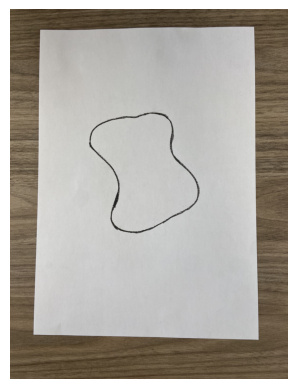

In [90]:
# Charger l'image
image = cv2.imread("shots/form_random1.png")
#image = cv2.imread("shots/form_random2.png")
#image = cv2.imread("shots/form_random3.png")
#image = cv2.imread("shots/coeur.png")
#image = cv2.imread("shots/trait.png")
#image = cv2.imread("shots/trait_doigt.png")
#image = cv2.imread("shots/griboulli.png")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

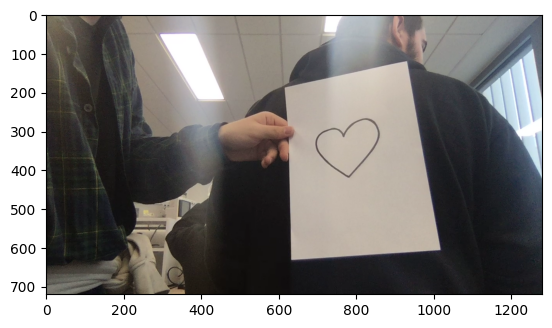

In [91]:
"""# Spécifier le dossier contenant les images
image_folder = "./shots"

# Récupérer tous les fichiers dans le dossier
image_files = os.listdir(image_folder)

# Trier la liste par date de modification (du plus récent au plus ancien)
image_files.sort(key=lambda x: os.path.getmtime(os.path.join(image_folder, x)), reverse=True)

# Charger la dernière image
latest_image_path = os.path.join(image_folder, image_files[0])
image = cv2.imread(latest_image_path)

# Afficher l'image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.axis('off')
plt.show()"""

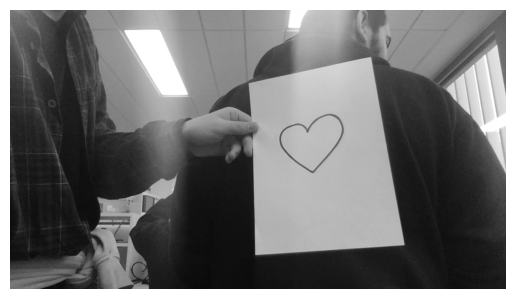

In [92]:
# Convertir en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,'gray')
plt.axis('off')
plt.show()

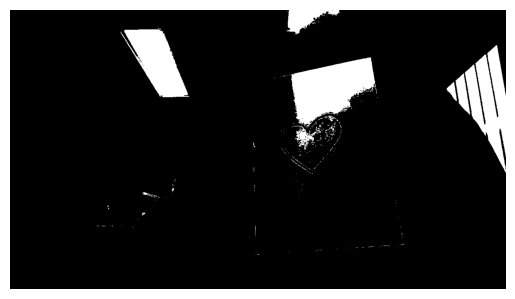

jknfsd
4.0
jknfsd
132.5


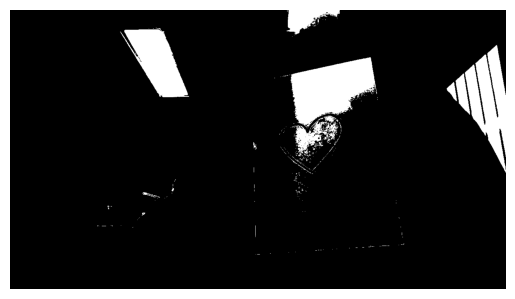

jknfsd
135.0


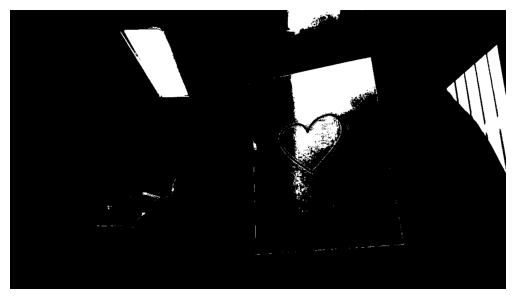

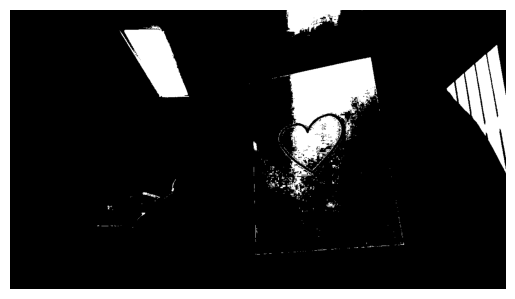

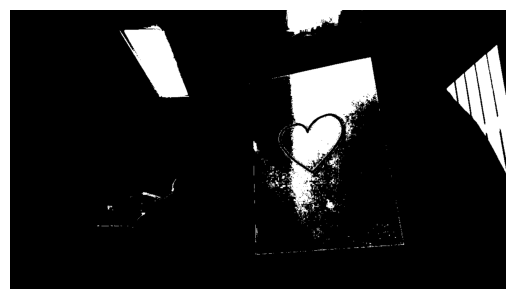

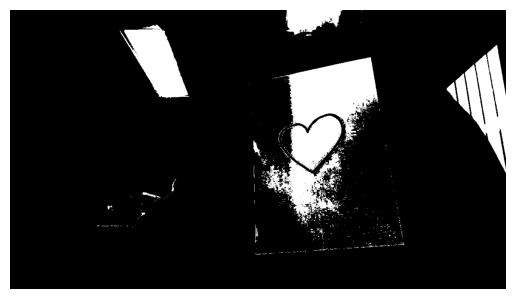

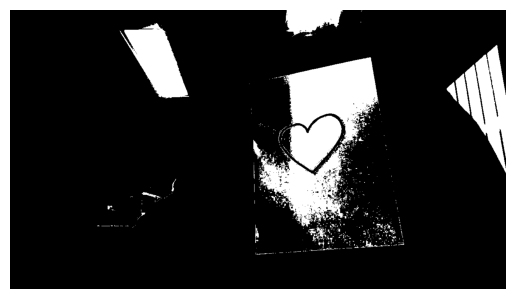

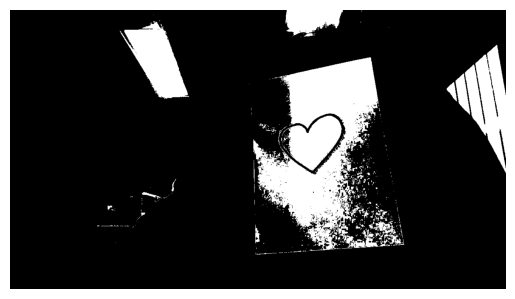

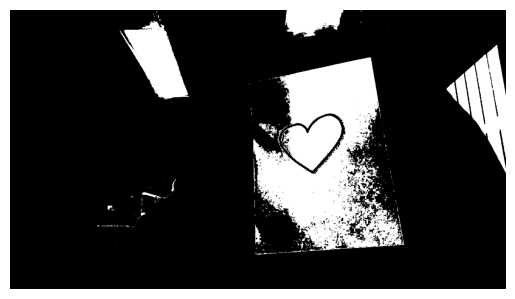

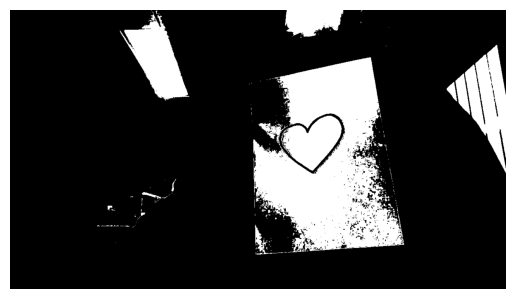

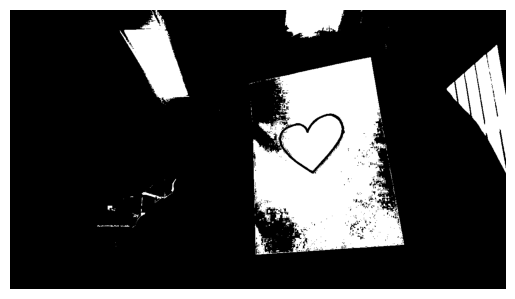

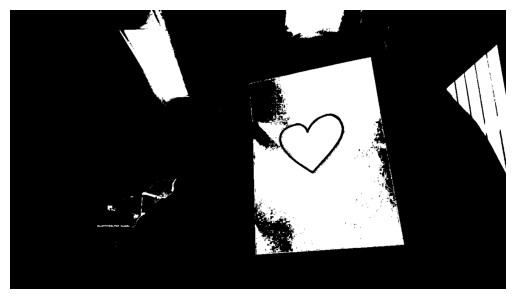

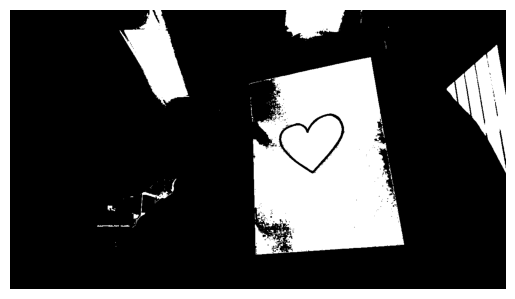

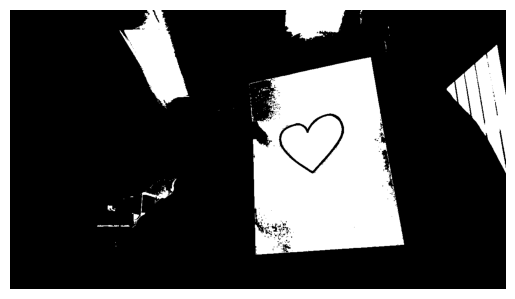

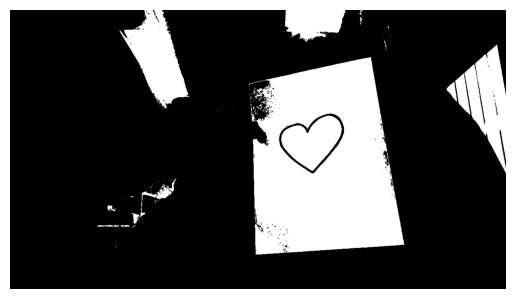

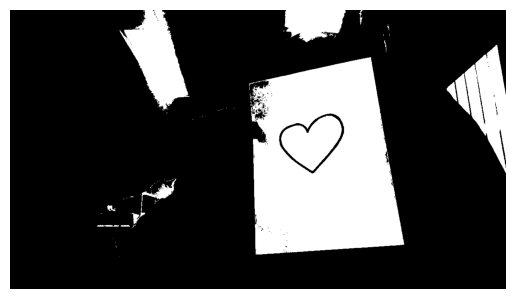

jknfsd
161987.5


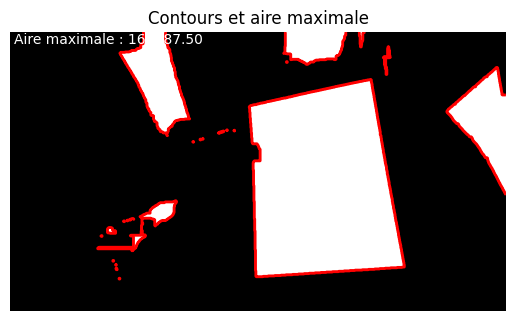

In [93]:
valeur_seuil = 190
max_area = 0

while max_area < 50000:
    # Binariser l'image
    _, thresh = cv2.threshold(gray, valeur_seuil, 255, cv2.THRESH_BINARY)

    plt.imshow(thresh,'gray')
    plt.axis('off')
    plt.show()

    # Appliquer un filtre morphologique
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    """
    plt.imshow(closing,'gray')
    plt.axis('off')
    plt.show()
 """
    # Appliquer la détection de contours avec Canny
    edges = cv2.Canny(closing, 50, 255)

    # Trouver les contours externes
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Trouver le plus grand contour qui correspond à un quadrilatère quelconque

    best_cnt = None
    for cnt in contours:
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * perimeter, True)
        if len(approx) == 4 and area > max_area:
            print("jknfsd")
            max_area = area
            best_cnt = cnt
            print(max_area)
    valeur_seuil -= 1

# Vérifier si le contour trouvé est suffisamment grand pour être un bord de papier
if max_area > (closing.shape[0] * closing.shape[1]) / 4:
    # Hachurer la plus grande aire
    best_cnt = best_cnt.reshape(best_cnt.shape[0], 2)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.contour(best_cnt, levels=[0], colors='blue')
    ax.fill(best_cnt[:, 0], best_cnt[:, 1], hatch='/', alpha=0.3, edgecolor='blue')
    ax.set_title('Contours et aire maximale')
    ax.text(10, 30, f'Aire maximale : {max_area:.2f}', color='white')
    ax.legend(['Contours', 'Aire maximale'], loc='upper right')

# Afficher l'image et les contours
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
plt.contour(edges, levels=[0], colors='red')
plt.title('Contours et aire maximale')
plt.text(10, 30, f'Aire maximale : {max_area:.2f}', color='white')
plt.axis('off')
plt.show()


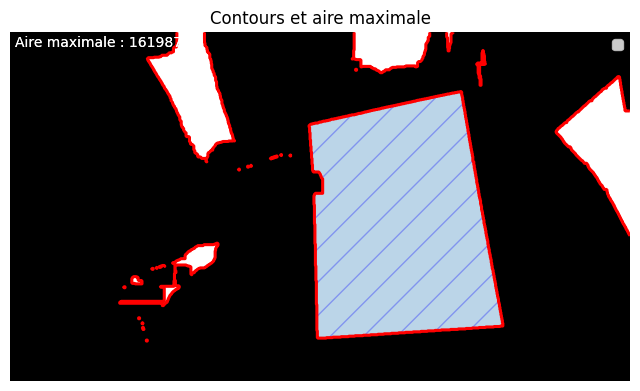

In [94]:
# Appliquer la détection de contours avec Canny
edges = cv2.Canny(closing, 165, 255)

# Trouver les contours externes
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Trouver le plus grand contour
max_area = 0
best_cnt = None
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > max_area:
        max_area = area
        best_cnt = cnt
        
best_cnt = best_cnt.reshape(best_cnt.shape[0], 2)

# Tracer les contours et la plus grande aire
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Ajouter un titre et une légende
ax.set_title('Contours et aire maximale')
ax.text(10, 30, f'Aire maximale : {max_area:.2f}', color='white')
ax.legend(['Contours', 'Aire maximale'], loc='upper right')

# Afficher l'image et les contours
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
plt.contour(edges, levels=[0], colors='red')

plt.title('Contours et aire maximale')
plt.text(10, 30, f'Aire maximale : {max_area:.2f}', color='white')
ax.contour(best_cnt, levels=[0], colors='blue')

# Hachurer la plus grande aire
ax.fill(best_cnt[:, 0], best_cnt[:, 1], hatch='/', alpha=0.3, edgecolor='blue')
plt.axis('off')
plt.show()

In [95]:
# Approximer le contour de l'aire hachurée en un polygone plus simple
epsilon = 0.05 * cv2.arcLength(best_cnt, True)
approx = cv2.approxPolyDP(best_cnt, epsilon, True)

# Trier les sommets du polygone en fonction de leur position
sorted_pts = sorted(approx, key=lambda x: x[0][0])

# Déterminer les coins haut gauche, haut droit, bas gauche, bas droit
top_left, bottom_left = sorted(sorted_pts[:2], key=lambda x: x[0][1])
top_right, bottom_right = sorted(sorted_pts[2:], key=lambda x: x[0][1])

# Afficher les coordonnées des coins initiaux
print("Coordonnées des coins initiaux :")
print(f"coin 1 : {tuple(top_left[0])}")
print(f"coin 2 : {tuple(top_right[0])}")
print(f"coin 3 : {tuple(bottom_left[0])}")
print(f"coin 4 : {tuple(bottom_right[0])}")

# Appliquer la marge alpha aux coins
alpha = -20
top_left += alpha * np.array([-1, -1])
top_right += alpha * np.array([1, -1])
bottom_left += alpha * np.array([-1, 1])
bottom_right += alpha * np.array([1, 1])

# Afficher les coordonnées des coins resserrés
print("\nCoordonnées des coins resserrés :")
print(f"coin 1 : {tuple(top_left[0])}")
print(f"coin 2 : {tuple(top_right[0])}")
print(f"coin 3 : {tuple(bottom_left[0])}")
print(f"coin 4 : {tuple(bottom_right[0])}")

Coordonnées des coins initiaux :
coin 1 : (617, 192)
coin 2 : (931, 122)
coin 3 : (635, 631)
coin 4 : (1017, 606)

Coordonnées des coins resserrés :
coin 1 : (637, 212)
coin 2 : (911, 142)
coin 3 : (655, 611)
coin 4 : (997, 586)


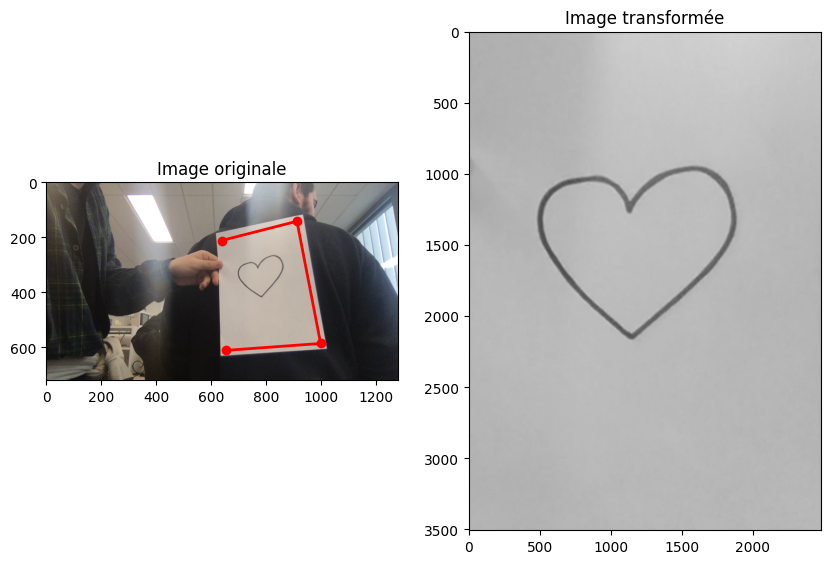

In [96]:
alpha = 30
# Définir les quatre coins du rectangle initial (en ordre : haut-gauche, haut-droit, bas-droit, bas-gauche)
rect = np.array([tuple(top_left[0]), tuple(top_right[0]), tuple(bottom_right[0]), tuple(bottom_left[0])])

# Calculer les longueurs des côtés opposés du rectangle
l1 = np.linalg.norm(top_right - top_left)
l2 = np.linalg.norm(top_right - bottom_right)

# Définir les dimensions de l'image de sortie
if l1 > l2:
    width = 3508
    height = 2480
else:
    width = 2480
    height = 3508

# Définir les quatre coins de l'image de sortie (en ordre : haut-gauche, haut-droit, bas-droit, bas-gauche)
dst = np.array([(0, 0), (width, 0), (width, height), (0, height)])


# Calculer la matrice de transformation
M = cv2.getPerspectiveTransform(rect.astype(np.float32), dst.astype(np.float32))

# Appliquer la transformation de perspective
warped = cv2.warpPerspective(gray, M, (width, height))

# Afficher l'image de départ et l'image transformée
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].plot(rect[:, 0], rect[:, 1], 'o-', color='red', linewidth=2)
axs[0].set_title('Image originale')
axs[1].imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
axs[1].set_title('Image transformée')
plt.show()

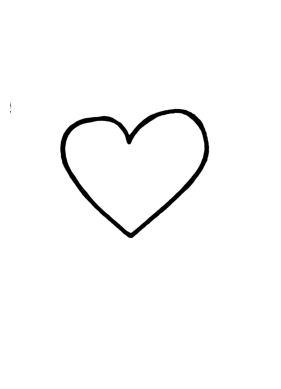

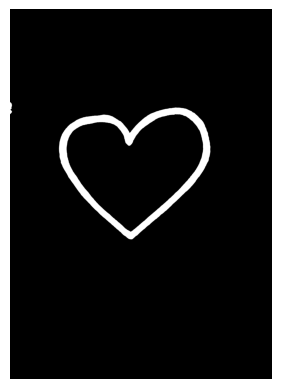

In [97]:
# Binariser l'image
_, thresh = cv2.threshold(warped, 160, 255, cv2.THRESH_BINARY)

plt.imshow(thresh,'gray')
plt.axis('off')
plt.show()

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
thresh = cv2.dilate(thresh, S, iterations = 2)

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
thresh = cv2.erode(thresh, S, iterations = 15)

thresh = np.invert(thresh)

plt.imshow(thresh,'gray')
plt.axis('off')
plt.show()

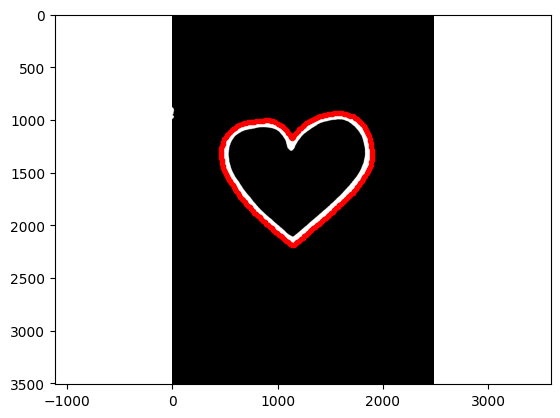

Liste de points redimensionnée en x : [723.187568759532, 700.732742885865, 680.1432971942058, 663.1637640040647, 643.2854095855954, 625.1508503928268, 608.9366159532902, 592.1021481536421, 575.8197103349202, 558.7176153171574, 540.8369183375897, 520.5279324008837, 504.5264338921253, 486.0023694635425, 467.6008757432296, 450.8612088645187, 434.0395736017092, 415.5969535989735, 399.16534753022984, 383.902541349675, 365.3779529628409, 349.376978412334, 332.2066800153862, 316.94387383483155, 300.72487936778924, 284.5742126090085, 268.81733155853766, 252.07766467982677, 234.84426927648477, 219.64437360870951, 207.78737598907261, 191.8540719788506, 179.9512946170655, 165.6983424808648, 152.33704295972774, 140.82870847422896, 126.44848776679154, 114.3783989904432, 99.63626522155703, 87.80163795506684, 77.99167417905372, 67.2032849731313, 55.03791572083574, 44.639067273320755, 34.94676320705003, 26.69527328735852, 18.175738759081018, 16.114637968500247, 9.366277704729194, 5.57139017911715, 5.5

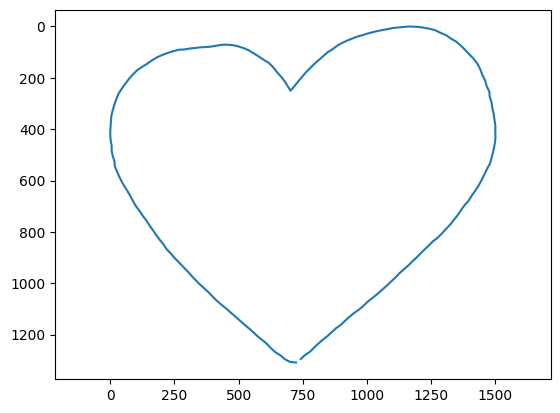

In [98]:
def rdp(points, epsilon):
    """ Implémentation de l'algorithme de Ramer-Douglas-Peucker pour simplifier une suite de points """
    dmax = 0
    index = 0
    end = len(points) - 1
    for i in range(1, end):
        d = distance_point_segment(points[i], points[0], points[end])
        if d > dmax:
            index = i
            dmax = d
    if dmax > epsilon:
        results1 = rdp(points[:index+1], epsilon)
        results2 = rdp(points[index:], epsilon)
        results1.extend(results2[1:])
        return results1
    else:
        return [points[0], points[end]]

def distance_point_segment(point, start, end):
    """ Calcul de la distance entre un point et un segment """
    if np.all(start == end):
        return np.linalg.norm(point - start)
    else:
        u = (point - start) / np.linalg.norm(end - start)
        proj = start + u * np.dot(end - start, u)
        if np.all(proj <= np.maximum(start, end)) and np.all(proj >= np.minimum(start, end)):
            return np.linalg.norm(proj - point)
        else:
            dist_start = np.linalg.norm(point - start)
            dist_end = np.linalg.norm(point - end)
            return min(dist_start, dist_end)

def get_trace(image, nb_points=500):
    # Trouver le contour le plus long de l'image
    contours = find_contours(image, 0.5, fully_connected='low')
    contour = max(contours, key=len)
    
    # Ajouter un point supplémentaire si la longueur du contour est impaire
    if len(contour) % 2 == 1:
        contour = np.concatenate([contour, [contour[-1]]])
    
    # Extraire les coordonnées x et y des points du contour
    x = contour[:, 1]
    y = contour[:, 0]
    
    # Appliquer un filtre de Savitzky-Golay pour lisser le contour
    x_smoothed = savgol_filter(x, 9, 3)
    y_smoothed = savgol_filter(y, 9, 3)
    contour_smoothed = np.column_stack((y_smoothed, x_smoothed))
    
    contour_simplified = rdp(contour_smoothed, 0.5)
    nb_contour_points = len(contour_simplified)
    
    # Calculer l'incrément pour sélectionner un nombre donné de points
    step = nb_contour_points / nb_points
    
    # Extraire les coordonnées x et y des points équidistants le long du contour
    x = []
    y = []
    for i in range(nb_points):
        index = int(i * step)
        point = contour_simplified[index]
        x.append(point[1])
        y.append(point[0])
                
    if len(contour) % 2 == 1:
        contour = np.concatenate([contour, [contour[-1]]])

    # Afficher les points sur l'image tresh
    plt.imshow(thresh, cmap='gray')
    plt.plot(x, y, 'r.')
    plt.axis('equal')
    plt.show()
        
    return x, y


# Extraire les listes x et y représentant le traçé de l'image
x, y = get_trace(thresh, nb_points=200)

min_x = min(x)
min_y = min(y)

# Calcul du facteur de redimensionnement
factor = max(max(x) - min_x, max(y) - min_y) / 1500

# Redimensionnement des listes de points
x = [(x[i] - min_x) / factor for i in range(len(x))]
y = [(y[i] - min_y) / factor for i in range(len(y))]

print("Liste de points redimensionnée en x :", x)
print("Liste de points redimensionnée en y :", y)

# Afficher les résultats
print("x : ", x)
print("y : ", y)

# Afficher les résultats
plt.plot(x, y)
plt.ylim(max(y), min(y)) # inverse les limites de l'axe y
plt.axis('equal')
plt.show()

In [99]:
deltas = []
thetas_abs = []
thetas_rel = []

# On considère que le robot est initialement orienté vers le premier point
angle_robot = math.atan2(y[1]-y[0], x[1]-x[0])

for i in range(len(x)-1):
    # Récupérer les coordonnées des points successifs
    x1, y1 = x[i], y[i]
    x2, y2 = x[i+1], y[i+1]

    # Calculer la distance entre les points
    delta = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    deltas.append(delta)

    # Calculer l'angle absolu entre les points (en radians)
    angle_abs = math.atan2(y2-y1, x2-x1)
    thetas_abs.append(angle_abs)

    # Calculer l'angle relatif entre les points (en radians)
    angle_rel = angle_abs - angle_robot
    thetas_rel.append(angle_rel)

    # Mettre à jour l'orientation du robot
    angle_robot = angle_abs

# Convertir les angles absolus et relatifs en degrés
thetas_abs_deg = [math.degrees(angle) for angle in thetas_abs]
thetas_rel_deg = [math.degrees(angle) for angle in thetas_rel]

# Afficher les résultats
print("Distances : ", deltas)
print("Angles absolus (en radians) : ", thetas_abs)
print("Angles relatifs (en radians) : ", thetas_rel)
print("Angles absolus (en degrés) : ", thetas_abs_deg)
print("Angles relatifs (en degrés) : ", thetas_rel_deg)


Distances :  [22.53635432942732, 23.244676783731038, 22.3267568514135, 23.51107666488302, 24.471614477071785, 23.704861452540666, 21.681934610842735, 20.775548584945174, 23.644716584786135, 23.83249274395896, 26.594624585008443, 21.459178797081215, 24.504896696133255, 24.588607230339623, 22.24313747216272, 21.440219823417785, 24.470212218186568, 22.964030071663174, 22.336917578179364, 25.022545590259888, 21.63740757922667, 24.28246886295659, 22.336917578179165, 24.390384662471654, 23.010854687577915, 22.92976660089668, 23.6734639294807, 26.70775983230462, 21.40641420899712, 22.073857143774504, 25.35926638782597, 20.128940963038886, 24.873901489869944, 23.13518984179935, 21.264184284890675, 23.81386447385522, 21.9163197965713, 24.74817302566872, 23.752259592362833, 20.94525065619477, 21.421073917304597, 22.694458967652416, 20.673158727206225, 21.883586901427346, 20.942326178859993, 21.37781309317803, 20.88196455066657, 22.555562468444236, 18.828491119736924, 21.794491584277253, 19.50136